# A Modest Replication Attempt of "Eureka! A Momentum Strategy that Also Works in Japan"
## Bilal Mustafa

Paper:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1982100

The data sources I use include:

Stock Universe Data: Compustat Stock Monthly Query (through WRDS) - Entire Database

S&P 500 Data: Compustat Stock Monthly Query (through WRDS) - SPY (proxy)

Factor Returns Information: 
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

Ken French Data Library

S&P 500 Constituent Information: 
https://github.com/Robot-Wealth/r-quant-recipes/tree/master/historical-spx-constituents

Scraped from Wikipedia Page by Source
(Note: Planned to get from Compustat, however, as of July 2020 it became licensed content and was removed from Compustat.)

In [1]:
import pandas as pd
import numpy as np

### Set up Stock Universe

In [ ]:
# Import Information for Stock Universe from Compustat
df = pd.read_csv(r"WRDS All Stocks Data 1997-2019.csv")

C:\Users\Bilal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# Format Columns
df.columns.values[2] = 'Date'
df.columns.values[3] = 'Ticker'
df.columns.values[5] = 'Name'
df.columns.values[6] = 'Price Monthly Close'
df.columns.values[7] = 'Monthly Total Return'
df.columns.values[12] = 'Shares Outstanding'
features = ['Date','Ticker','Name','Price Monthly Close','Monthly Total Return','Shares Outstanding']

In [ ]:
# Set up working dataframe and format date
working_df = df.iloc[:,[2,3,5,6,7,12]]
working_df['Date'] = working_df['Date'].apply(lambda x: int(str(x)[:6]))
working_df

<ipython-input-310-ecff0fb6c215>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Date'] = working_df['Date'].apply(lambda x: int(str(x)[:6]))


,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,cik
0,199712,ANTQ,A.A. IMPORTING CO INC,0.010,0.0000,NaN,730052.0
1,199801,ANTQ,A.A. IMPORTING CO INC,0.010,0.0000,NaN,730052.0
2,199802,ANTQ,A.A. IMPORTING CO INC,0.010,0.0000,NaN,730052.0
3,199803,ANTQ,A.A. IMPORTING CO INC,NaN,0.0000,NaN,730052.0
4,199810,ANTQ,A.A. IMPORTING CO INC,0.010,NaN,NaN,730052.0
...,...,...,...,...,...,...,...
4468701,201908,TPPTY,TPG TELECOM LTD,8.974,-6.7346,927811000.0,1641424.0
4468702,201909,TPPTY,TPG TELECOM LTD,9.361,4.3125,927811000.0,1641424.0
4468703,201910,TPPTY,TPG TELECOM LTD,9.012,-3.7282,927811000.0,1641424.0
4468704,201911,TPPTY,TPG TELECOM LTD,9.456,4.9268,927811000.0,1641424.0


### Include only S&P 500 constituents

In [10]:
# Import historical S&P constituents
import pyreadr
result = pyreadr.read_r(r'historicalspx.RDS')
constituents_df = result[None]

In [11]:
# Filter for dates of interest and format date
constituents_df['Date'] = constituents_df['Date'].apply(lambda x: 100*x.year + x.month)
constituents_df = constituents_df.loc[(constituents_df['Date'] >= 199712) & (constituents_df['Date'] <= 201912)]
constituents_df

,Date,Ticker,Name
2528,201912,MMM,3M Company
2529,201912,ABT,Abbott Laboratories
2530,201912,ABBV,AbbVie Inc.
2531,201912,ABMD,ABIOMED Inc
2532,201912,ACN,Accenture plc
...,...,...,...
137259,199712,BS,Bethlehem Steel
137260,199712,OI,Owens-Illinois
137261,199712,GRA,W.R. Grace
137262,199712,CCK,Crown Holdings


In [ ]:
# Filter stock universe for all S&P constituents from 1997 to 2019
constituent_list = constituents_df['Ticker'].unique()
working_df = working_df.loc[working_df['Ticker'].isin(constituent_list)]
working_df

,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,cik
1844,201312,AAL,AMERICAN AIRLINES GROUP INC,25.25,NaN,219297000.0,6201.0
1845,201401,AAL,AMERICAN AIRLINES GROUP INC,33.55,32.8713,219297000.0,6201.0
1846,201402,AAL,AMERICAN AIRLINES GROUP INC,36.93,10.0745,219297000.0,6201.0
1847,201403,AAL,AMERICAN AIRLINES GROUP INC,36.60,-0.8936,471517000.0,6201.0
1848,201404,AAL,AMERICAN AIRLINES GROUP INC,35.07,-4.1803,720196000.0,6201.0
...,...,...,...,...,...,...,...
4467058,201908,ALLE,ALLEGION PLC,96.27,-7.0214,93376000.0,1579241.0
4467059,201909,ALLE,ALLEGION PLC,103.65,7.9464,93376000.0,1579241.0
4467060,201910,ALLE,ALLEGION PLC,116.04,11.9537,92917000.0,1579241.0
4467061,201911,ALLE,ALLEGION PLC,120.03,3.4385,92917000.0,1579241.0


In [ ]:
# Check to see how many constituents S&P 500 contains in each month
constituents_df.groupby('Date').count()

,Ticker,Name
Date,,
199712,511,511
199801,511,511
199802,511,511
199803,511,511
199804,511,511
...,...,...
201908,506,506
201909,506,506
201910,506,506


In [ ]:
# Compare with the number of constituents we have in our universe 
# (not exact as this may contain a stock in December 1997 which may not have been added into the S&P 500 till later)
working_df.groupby('Date').count()

,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,cik
Date,,,,,,
199712,471,471,471,469,0,470
199801,472,472,472,471,0,471
199802,473,473,473,472,0,472
199803,474,474,474,473,0,473
199804,475,475,475,474,475,474
...,...,...,...,...,...,...
201908,578,578,578,578,577,578
201909,577,577,577,577,576,577
201910,576,576,576,576,576,576


In [ ]:
# Check to see how many constituents we are missing each month
dates = constituents_df['Date'].unique()
missing = [0 for i in range(len(dates))]
for i in range(len(dates)):
    for ticker in constituents_df[constituents_df['Date'] == dates[i]]['Ticker']:
        if ticker not in working_df[working_df['Date'] == dates[i]]['Ticker'].values:
            missing[i] += 1

In [ ]:
# Missing number of constituents is much higher in earlier years but immaterial in later years
missing_df = pd.DataFrame(np.array(missing), index = dates)
missing_df

,0
201912,2
201911,2
201910,2
201909,2
201908,2
...,...
199804,127
199803,128
199802,129
199801,130


### Fill Missing Values

In [ ]:
# Fill down/up missing values of Price and Shares Outstanding
working_df['Price Monthly Close'] = working_df.groupby('Ticker')['Price Monthly Close'].ffill()
working_df['Shares Outstanding'] = working_df.groupby('Ticker')['Shares Outstanding'].ffill().bfill()

# Very few values of monthly returns are missing (not including the very first month for which price is available)
# Dropping these values should not result in a material difference
working_df.drop(working_df[working_df['Monthly Total Return'].isnull()].index, inplace = True)
working_df

<ipython-input-314-5b794b2cea27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Price Monthly Close'] = working_df.groupby('Ticker')['Price Monthly Close'].ffill()
<ipython-input-314-5b794b2cea27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Shares Outstanding'] = working_df.groupby('Ticker')['Shares Outstanding'].ffill().bfill()
C:\Users\Bilal\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,cik
1845,201401,AAL,AMERICAN AIRLINES GROUP INC,33.55,32.8713,219297000.0,6201.0
1846,201402,AAL,AMERICAN AIRLINES GROUP INC,36.93,10.0745,219297000.0,6201.0
1847,201403,AAL,AMERICAN AIRLINES GROUP INC,36.60,-0.8936,471517000.0,6201.0
1848,201404,AAL,AMERICAN AIRLINES GROUP INC,35.07,-4.1803,720196000.0,6201.0
1849,201405,AAL,AMERICAN AIRLINES GROUP INC,40.16,14.5138,720196000.0,6201.0
...,...,...,...,...,...,...,...
4467058,201908,ALLE,ALLEGION PLC,96.27,-7.0214,93376000.0,1579241.0
4467059,201909,ALLE,ALLEGION PLC,103.65,7.9464,93376000.0,1579241.0
4467060,201910,ALLE,ALLEGION PLC,116.04,11.9537,92917000.0,1579241.0
4467061,201911,ALLE,ALLEGION PLC,120.03,3.4385,92917000.0,1579241.0


### Import Factor Returns

In [19]:
# Get five factor monthly information from Kenneth R. French - Data Library
all_factors = pd.read_csv(r"F_F_Research_Data_5_Factors_2x3.CSV")
all_factors.columns.values[0] = 'Date'
all_factors['Mkt'] = all_factors['Mkt-RF'] + all_factors['RF']

# The returns we need for now are Mkt-Rf,Rf, Mkt
factors = all_factors.iloc[:,[0,1,6,7]]
factors

,Date,Mkt-RF,RF,Mkt
0,196307,-0.39,0.27,-0.12
1,196308,5.07,0.25,5.32
2,196309,-1.57,0.27,-1.30
3,196310,2.53,0.29,2.82
4,196311,-0.85,0.27,-0.58
...,...,...,...,...
684,202007,5.77,0.01,5.78
685,202008,7.63,0.01,7.64
686,202009,-3.63,0.01,-3.62
687,202010,-2.10,0.01,-2.09


In [ ]:
# Merge factor return information onto our working dataframe
working_df = working_df.merge(factors, how = 'left', on = 'Date')
working_df

,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,cik,Mkt-RF,RF,Mkt
0,201401,AAL,AMERICAN AIRLINES GROUP INC,33.55,32.8713,219297000.0,6201.0,-3.32,0.00,-3.32
1,201402,AAL,AMERICAN AIRLINES GROUP INC,36.93,10.0745,219297000.0,6201.0,4.65,0.00,4.65
2,201403,AAL,AMERICAN AIRLINES GROUP INC,36.60,-0.8936,471517000.0,6201.0,0.43,0.00,0.43
3,201404,AAL,AMERICAN AIRLINES GROUP INC,35.07,-4.1803,720196000.0,6201.0,-0.19,0.00,-0.19
4,201405,AAL,AMERICAN AIRLINES GROUP INC,40.16,14.5138,720196000.0,6201.0,2.06,0.00,2.06
...,...,...,...,...,...,...,...,...,...,...
149509,201908,ALLE,ALLEGION PLC,96.27,-7.0214,93376000.0,1579241.0,-2.58,0.16,-2.42
149510,201909,ALLE,ALLEGION PLC,103.65,7.9464,93376000.0,1579241.0,1.43,0.18,1.61
149511,201910,ALLE,ALLEGION PLC,116.04,11.9537,92917000.0,1579241.0,2.06,0.15,2.21
149512,201911,ALLE,ALLEGION PLC,120.03,3.4385,92917000.0,1579241.0,3.87,0.12,3.99


### Residual Calculation

In [ ]:
# Calculate Excess Stock Return and set up idiosyncratic return
working_df['RI-RF'] = working_df['Monthly Total Return'] - working_df['RF']
working_df['e'] = pd.NA

In [5]:
# Calculate residuals of CAPM model (required for Momentum Calculation)
# Using one year for each regression/ residual (paper uses three)
# A few stocks are dropped as not enough data points for regression calculation
import statsmodels.api as sm
counter = 0
for ticker in working_df['Ticker'].unique():
    counter += 1
    #if counter%50 == 0:
    #    print(counter," stocks done")
    if len(working_df[working_df['Ticker'] == ticker]['RI-RF']) >= 12:
        for i in range(len(working_df[working_df['Ticker'] == ticker]['RI-RF']) - 11):
            Y = working_df[working_df['Ticker'] == ticker]['RI-RF'].iloc[i:i+12]
            X = working_df[working_df['Ticker'] == ticker]['Mkt-RF'].iloc[i:i+12]
            X = sm.add_constant(X)
            curr_date = working_df[working_df['Ticker'] == ticker]['Date'].iloc[i+11]
            model = sm.OLS(endog = Y, exog = X).fit()
            working_df.loc[(working_df['Ticker'] == ticker) & (working_df['Date'] == curr_date), 'e']  = model.resid.values[-1]
            
working_df

,Unnamed: 0,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,Mkt-RF,RF,Mkt,RI-RF,e
0,131611,199912,A,AGILENT TECHNOLOGIES INC,77.3125,83.2593,445000000.0,7.72,0.44,8.16,82.8193,NaN
1,131612,200001,A,AGILENT TECHNOLOGIES INC,66.1875,-14.3897,452000000.0,-4.74,0.41,-4.33,-14.7997,NaN
2,131613,200002,A,AGILENT TECHNOLOGIES INC,103.8750,56.9405,452000000.0,2.45,0.43,2.88,56.5105,NaN
3,131614,200003,A,AGILENT TECHNOLOGIES INC,104.0000,0.1203,452000000.0,5.20,0.47,5.67,-0.3497,NaN
4,131615,200004,A,AGILENT TECHNOLOGIES INC,88.6250,-14.7837,452000000.0,-6.40,0.46,-5.94,-15.2437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149509,86598,201908,ZTS,ZOETIS INC,126.4200,10.0357,477558000.0,-2.58,0.16,-2.42,9.8757,8.647474
149510,86599,201909,ZTS,ZOETIS INC,124.5900,-1.4476,477558000.0,1.43,0.18,1.61,-1.6276,-5.050502
149511,86600,201910,ZTS,ZOETIS INC,127.9200,2.8044,477558000.0,2.06,0.15,2.21,2.6544,-1.030775
149512,86601,201911,ZTS,ZOETIS INC,120.5200,-5.7849,476299000.0,3.87,0.12,3.99,-5.9049,-9.476757


### IMOM Calculation

In [6]:
# Calculate IMOM. Drop rows where value of e is N/A (i.e. the first month), since a IMOM value cannot be determined 
# for that month and hence the stock is immaterial for this strategy at that point in time.
working_df['IMOM'] = pd.NA
for ticker in working_df['Ticker'].unique():
    working_df.drop(working_df[working_df['e'].isnull()].index, inplace = True)
    working_df.loc[working_df['Ticker'] == ticker,'IMOM'] = \
    (1+working_df[working_df['Ticker'] == ticker]['e'].shift()/100).rolling(window=11).apply(np.prod, raw = True) - 1

In [7]:
working_df

,Unnamed: 0,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,Mkt-RF,RF,Mkt,RI-RF,e,IMOM
11,131622,200011,A,AGILENT TECHNOLOGIES INC,52.1875,12.6856,453015000.0,-10.72,0.51,-10.21,12.1756,43.486734,NaN
12,131623,200012,A,AGILENT TECHNOLOGIES INC,54.7500,4.9102,453015000.0,1.19,0.50,1.69,4.4102,-2.300888,NaN
13,131624,200101,A,AGILENT TECHNOLOGIES INC,54.5500,-0.3653,456366000.0,3.13,0.54,3.67,-0.9053,-11.181981,NaN
14,131625,200102,A,AGILENT TECHNOLOGIES INC,36.0000,-34.0055,456366000.0,-10.05,0.38,-9.67,-34.3855,-10.660032,NaN
15,131626,200103,A,AGILENT TECHNOLOGIES INC,30.7300,-14.6389,456770000.0,-7.26,0.42,-6.84,-15.0589,2.535057,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149509,86598,201908,ZTS,ZOETIS INC,126.4200,10.0357,477558000.0,-2.58,0.16,-2.42,9.8757,8.647474,0.0382656
149510,86599,201909,ZTS,ZOETIS INC,124.5900,-1.4476,477558000.0,1.43,0.18,1.61,-1.6276,-5.050502,0.147945
149511,86600,201910,ZTS,ZOETIS INC,127.9200,2.8044,477558000.0,2.06,0.15,2.21,2.6544,-1.030775,0.0988548
149512,86601,201911,ZTS,ZOETIS INC,120.5200,-5.7849,476299000.0,3.87,0.12,3.99,-5.9049,-9.476757,0.0707683


### Portfolio Construction

In [14]:
# Drop all rows with a null IMOM value as the stock will not be selected for the strategy in that month
# Additionally drop all rows that concern a stock during a period where it was not an S&P 500 constituent
working_df.drop(working_df[working_df['IMOM'].isnull()].index, inplace = True)
constituents_df['Indicator'] = constituents_df['Date'].apply(lambda x: str(x)) + constituents_df['Ticker']  
working_df['Indicator'] = working_df['Date'].apply(lambda x: str(x)) + working_df['Ticker']
working_df['Drop'] = 1
working_df.loc[working_df['Indicator'].isin(constituents_df['Indicator']), 'Drop'] = 0
working_df.drop(working_df[working_df['Drop'] == 1].index, inplace = True)
del working_df['Drop']
del working_df['Indicator']
working_df

<ipython-input-14-2c779aad7f39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constituents_df['Indicator'] = constituents_df['Date'].apply(lambda x: str(x)) + constituents_df['Ticker']


,Unnamed: 0,Date,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,Mkt-RF,RF,Mkt,RI-RF,e,IMOM
22,131633,200110,A,AGILENT TECHNOLOGIES INC,22.27,13.9130,460637000.0,2.46,0.22,2.68,13.6930,8.997984,-0.114058
23,131634,200111,A,AGILENT TECHNOLOGIES INC,27.27,22.4517,460637000.0,7.54,0.17,7.71,22.2817,2.226165,-0.327005
24,131635,200112,A,AGILENT TECHNOLOGIES INC,28.51,4.5471,461000000.0,1.61,0.15,1.76,4.3971,0.799053,-0.295821
25,131636,200201,A,AGILENT TECHNOLOGIES INC,30.35,6.4539,463695000.0,-1.44,0.14,-1.30,6.3139,9.446354,-0.200831
26,131637,200202,A,AGILENT TECHNOLOGIES INC,31.15,2.6359,463695000.0,-2.29,0.13,-2.16,2.5059,6.512004,-0.0209742
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149509,86598,201908,ZTS,ZOETIS INC,126.42,10.0357,477558000.0,-2.58,0.16,-2.42,9.8757,8.647474,0.0382656
149510,86599,201909,ZTS,ZOETIS INC,124.59,-1.4476,477558000.0,1.43,0.18,1.61,-1.6276,-5.050502,0.147945
149511,86600,201910,ZTS,ZOETIS INC,127.92,2.8044,477558000.0,2.06,0.15,2.21,2.6544,-1.030775,0.0988548
149512,86601,201911,ZTS,ZOETIS INC,120.52,-5.7849,476299000.0,3.87,0.12,3.99,-5.9049,-9.476757,0.0707683


In [13]:
# Take a look at the number of stocks left in our universe after the purge
working_df.groupby('Date').count()

,Unnamed: 0,Ticker,Name,Price Monthly Close,Monthly Total Return,Shares Outstanding,Mkt-RF,RF,Mkt,RI-RF,e,IMOM
Date,,,,,,,,,,,,
199910,469,469,469,469,469,469,469,469,469,469,469,469
199911,471,471,471,471,471,471,471,471,471,471,471,471
199912,472,472,472,472,472,472,472,472,472,472,472,472
200001,473,473,473,473,473,473,473,473,473,473,473,473
200002,474,474,474,474,474,474,474,474,474,474,474,474
...,...,...,...,...,...,...,...,...,...,...,...,...
201908,568,568,568,568,568,568,568,568,568,568,568,568
201909,569,569,569,569,569,569,569,569,569,569,569,569
201910,569,569,569,569,569,569,569,569,569,569,569,569


In [15]:
# Calculate Stock market cap during each month and create column for next month return (to allow easy calculation)
working_df['Next Month Return'] = working_df.groupby('Ticker')['Monthly Total Return'].shift(-1)
working_df['Market Cap'] = working_df['Shares Outstanding'] * working_df['Price Monthly Close']

In [16]:
# Get list of dates from Jan 2000 to November 2019 (omitting last month)
dates = list(working_df['Date'].unique())
dates.sort()
dates = dates[3:-1]

# The strategy will loop through these dates. Each month it will long a portfolio made up of the 
# top quintile (with respect to IMOM) and short the bottom quintile. Returns are calculated both
# on a market weighted basis and an equal weighted basis.
equal_weighted_returns = []
market_weighted_returns = []
for date in dates:
    lower = working_df.loc[working_df['Date'] == date]['IMOM'].quantile(0.2)
    upper = working_df.loc[working_df['Date'] == date]['IMOM'].quantile(0.8)
    losers_equal_returns = working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] <= lower)]['Next Month Return'].mean()
    winners_equal_returns = working_df.loc[(working_df['Date'] == date) &
                                                    (working_df['IMOM'] >= upper)]['Next Month Return'].mean()
    WML = winners_equal_returns - losers_equal_returns
    equal_weighted_returns.append(WML)
    
    losers_market_cap = working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] <= lower)]['Market Cap'].sum()
    losers_weight = working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] <= lower)]['Market Cap']/losers_market_cap
    losers_market_return = (losers_weight * working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] <= lower)]['Next Month Return']).sum()
    winners_market_cap = working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] >= upper)]['Market Cap'].sum()
    winners_weight = working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] >= upper)]['Market Cap']/winners_market_cap
    winners_market_return = (winners_weight * working_df.loc[(working_df['Date'] == date) &
                                                   (working_df['IMOM'] >= upper)]['Next Month Return']).sum()
    WML = winners_market_return - losers_market_return
    market_weighted_returns.append(WML)
    


### Analysis

In [17]:
# Create a dataframe of strategy returns
portfolio_returns = pd.DataFrame({'Date':dates, 'Equal Weighted Returns': equal_weighted_returns, 
                                  'Market Weighted Returns':market_weighted_returns}, index = dates)

In [20]:
# Merge with factors for ease of analysis
portfolio_returns = portfolio_returns.merge(all_factors, on = 'Date', how = 'left')
portfolio_returns

,Date,Equal Weighted Returns,Market Weighted Returns,Mkt-RF,SMB,HML,RMW,CMA,RF,Mkt
0,200001,8.259205,15.540007,-4.74,4.35,-1.46,-6.07,4.73,0.41,-4.33
1,200002,-7.841486,-12.654668,2.45,18.05,-9.05,-18.48,-0.51,0.43,2.88
2,200003,0.491179,3.686986,5.20,-14.86,7.49,11.53,-1.05,0.47,5.67
3,200004,-3.584379,-5.180645,-6.40,-5.28,7.68,7.66,5.27,0.46,-5.94
4,200005,9.979469,5.557911,-4.42,-4.06,4.91,4.36,0.74,0.50,-3.92
...,...,...,...,...,...,...,...,...,...,...
234,201907,8.059260,5.684715,1.19,-1.90,0.30,-0.16,0.34,0.19,1.38
235,201908,-2.572234,-0.530808,-2.58,-3.29,-4.93,0.42,-0.89,0.16,-2.42
236,201909,-1.313865,-4.151097,1.43,0.26,6.78,1.99,3.50,0.18,1.61
237,201910,-2.991940,-3.667833,2.06,0.21,-2.09,0.25,-0.99,0.15,2.21


In [5]:
portfolio_returns = portfolio_returns.iloc[:,1:]
portfolio_returns['Equal Weighted Returns'] = portfolio_returns['Equal Weighted Returns'].shift()
portfolio_returns['Market Weighted Returns'] = portfolio_returns['Market Weighted Returns'].shift()
portfolio_returns = portfolio_returns.iloc[1:,:]
portfolio_returns

,Date,Equal Weighted Returns,Market Weighted Returns,Mkt-RF,SMB,HML,RMW,CMA,RF,Mkt
1,200002,8.259205,15.540007,2.45,18.05,-9.05,-18.48,-0.51,0.43,2.88
2,200003,-7.841486,-12.654668,5.20,-14.86,7.49,11.53,-1.05,0.47,5.67
3,200004,0.491179,3.686986,-6.40,-5.28,7.68,7.66,5.27,0.46,-5.94
4,200005,-3.584379,-5.180645,-4.42,-4.06,4.91,4.36,0.74,0.50,-3.92
5,200006,9.979469,5.557911,4.64,9.82,-8.19,-8.05,-3.07,0.40,5.04
...,...,...,...,...,...,...,...,...,...,...
234,201907,-1.365623,-0.144701,1.19,-1.90,0.30,-0.16,0.34,0.19,1.38
235,201908,8.059260,5.684715,-2.58,-3.29,-4.93,0.42,-0.89,0.16,-2.42
236,201909,-2.572234,-0.530808,1.43,0.26,6.78,1.99,3.50,0.18,1.61
237,201910,-1.313865,-4.151097,2.06,0.21,-2.09,0.25,-0.99,0.15,2.21


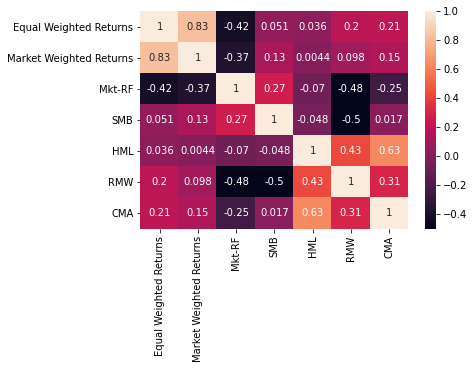

In [6]:
# Check for correlations between Momentum strategy and other factors
import seaborn as sns
sns.heatmap(portfolio_returns.iloc[:,1:-2].corr(), annot = True)

Momentum factor captured is uncorrelated with Fama French Factors.

In [8]:
# Run regression to see relationship of Equal Weighted IMOM Returns with other factors
import statsmodels.api as sm
Y = portfolio_returns.iloc[:,1]
X = portfolio_returns.iloc[:,[9,4,5,6,7]]
X = sm.add_constant(X)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Equal Weighted Returns   R-squared:                       0.226
Model:                                OLS   Adj. R-squared:                  0.210
Method:                     Least Squares   F-statistic:                     13.58
Date:                    Wed, 03 Feb 2021   Prob (F-statistic):           1.26e-11
Time:                            22:50:52   Log-Likelihood:                -642.77
No. Observations:                     238   AIC:                             1298.
Df Residuals:                         232   BIC:                             1318.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0554      0.253      0.219      0.827      -0.443       0.554
Mkt           -0.3684      0.066     -5.577      0.000      -0.499      -0.238
SMB            0.2839      0.092      3.073      0.002       0.102       0.466
HML           -0.1694      0.109     -1.559      0.120      -0.384       0.045
RMW            0.1763      0.118      1.499      0.135      -0.055       0.408
CMA            0.3067      0.157      1.953      0.052      -0.003       0.616
==============================================================================
Omnibus:                       55.493   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.538
Skew:                          -0.909   Prob(JB):                     1.05e-44
Kurtosis:                       7.137   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Run regression to see relationship of Market Cap Weighted IMOM Returns with other factors
Y = portfolio_returns.iloc[:,2]
X = portfolio_returns.iloc[:,[9,4,5,6,7]]
X = sm.add_constant(X)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Market Weighted Returns   R-squared:                       0.197
Model:                                 OLS   Adj. R-squared:                  0.179
Method:                      Least Squares   F-statistic:                     11.36
Date:                     Wed, 03 Feb 2021   Prob (F-statistic):           8.11e-10
Time:                             22:51:28   Log-Likelihood:                -657.44
No. Observations:                      238   AIC:                             1327.
Df Residuals:                          232   BIC:                             1348.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2434      0.269      0.905      0.366      -0.286       0.773
Mkt           -0.3926      0.070     -5.588      0.000      -0.531      -0.254
SMB            0.3569      0.098      3.633      0.000       0.163       0.550
HML           -0.1191      0.116     -1.030      0.304      -0.347       0.109
RMW            0.0623      0.125      0.498      0.619      -0.184       0.309
CMA            0.1991      0.167      1.192      0.235      -0.130       0.528
==============================================================================
Omnibus:                       16.929   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.954
Skew:                          -0.232   Prob(JB):                     4.71e-10
Kurtosis:                       5.029   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: Unlike the paper that uses annualized returns, the returns used above are monthly.